In [1]:
import pandas as pd
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

In [2]:
data = pd.read_csv('/Users/syan/DataScience/test_codes/NLP/interview_dataset.csv', error_bad_lines=False)

Skipping line 44: expected 4 fields, saw 8
Skipping line 45: expected 4 fields, saw 5
Skipping line 18798: expected 4 fields, saw 7
Skipping line 32145: expected 4 fields, saw 5
Skipping line 38888: expected 4 fields, saw 21
Skipping line 43707: expected 4 fields, saw 9
Skipping line 59495: expected 4 fields, saw 18
Skipping line 71979: expected 4 fields, saw 6
Skipping line 75651: expected 4 fields, saw 6
Skipping line 75864: expected 4 fields, saw 5
Skipping line 76298: expected 4 fields, saw 11
Skipping line 77021: expected 4 fields, saw 5
Skipping line 88982: expected 4 fields, saw 9
Skipping line 95139: expected 4 fields, saw 5
Skipping line 96523: expected 4 fields, saw 5
Skipping line 99169: expected 4 fields, saw 5
Skipping line 100664: expected 4 fields, saw 6
Skipping line 102151: expected 4 fields, saw 5
Skipping line 104137: expected 4 fields, saw 5
Skipping line 105744: expected 4 fields, saw 5
Skipping line 109188: expected 4 fields, saw 8

Skipping line 132555: expected 

In [3]:
data.head()

,id,pos_id,title,summary
0,192841627,700291706,Field Service Contractor,"Onforce.com, Fieldsolutions.com, FieldNation.c..."
1,192158267,698327712,Medical Claims Processor,"Processing medical claims using codes CPT, ICD-9."
2,162830031,649732842,Deputy Officer,Brakes India Limited is a leading manufacturer...
3,192683907,699801203,Quality Inspector,Responsibilities \n Inspect honda carpet on fi...
4,111311501,568294846,Grocery Team Leader,Currently managing staff of 13 employees throu...


In [4]:
data.shape, data['id'].nunique(), data['pos_id'].nunique()

((171211, 4), 170902, 171159)

### Field "summary" includes the self-descriptions of the candidates

In [5]:
data['summary'].iloc[2]

'Brakes India Limited is a leading manufacturer of Auto components. We provide innovative and eco-efficient solutions for Air Caliper Machining and Piston Housing Caliper Machine. My role as individual contributor involves day to day treasury operations.'

### cleaning data

In [6]:
data['title'] = data['title'].apply(lambda x: str(x).lower())
data['summary'] = data['summary'].apply(lambda x: str(x).lower())

In [7]:
data['title'] = data['title'].apply(lambda x: str(x).translate(string.maketrans("",""), string.punctuation))
data['summary'] = data['summary'].apply(lambda x: str(x).translate(string.maketrans("",""), string.punctuation))

In [8]:
data['combined_field'] = data['title'] + ' ' + data['summary']

In [9]:
data['combined_field'].iloc[1]

'medical claims processor processing medical claims using codes cpt icd9'

### 1-3 grams on "title" + "summary"

In [10]:
print nltk.corpus.stopwords.words('english')

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [11]:
sampled_df = data.sample(17000)

In [12]:
sampled_df['title'].nunique(), sampled_df.shape

(11804, (17000, 5))

In [13]:
tv = TfidfVectorizer(ngram_range=(1,3), max_df=0.8, min_df=5, 
                     stop_words=nltk.corpus.stopwords.words('english'), 
                     token_pattern=u'(?u)\\b\\w\\w\\w+\\b')

fitted_df = tv.fit_transform(sampled_df['combined_field'])

In [14]:
token_name = tv.get_feature_names()
token_count = fitted_df.sum(axis=0)
new_df = pd.DataFrame(token_count.T, index=token_name, columns=['Count'])
new_df.sort_values('Count', ascending=False)[:10]

,Count
sales,242.193136
manager,217.778444
customer,211.590242
service,201.424843
management,197.829684
business,175.999493
team,169.899153
new,162.817021
development,161.534070
project,159.593266


### visualization

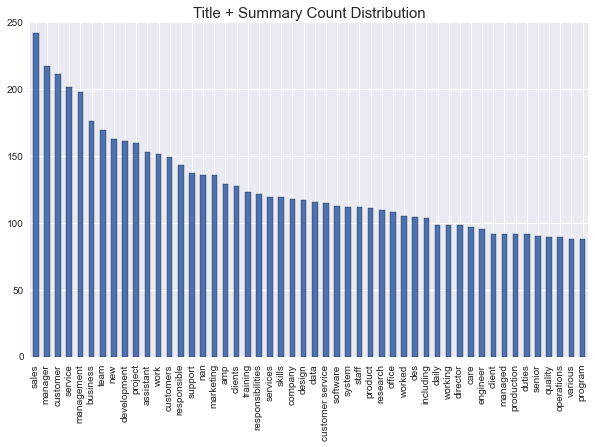

In [15]:
plt.figure(figsize=(10,6))
new_df.sort_values('Count', ascending=False)['Count'].head(50).plot(kind='bar')
plt.title('Title + Summary Count Distribution', fontsize=15)

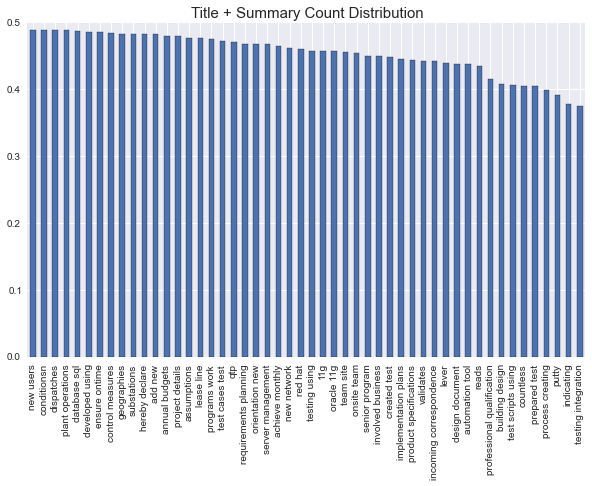

In [16]:
plt.figure(figsize=(10,6))
new_df.sort_values('Count', ascending=False)['Count'].tail(50).plot(kind='bar')
plt.title('Title + Summary Count Distribution', fontsize=15)

In [17]:
sampled_df.shape, sampled_df['title'].nunique()

((17000, 5), 11804)

In [18]:
sampled_df.reset_index(drop=True, inplace=True)

### restart: combine the summaries and titles belonging to the same title

In [19]:
combined_df = sampled_df.groupby(['title'])['combined_field'].apply(lambda x: ' '.join(list(x)))

In [20]:
combined_df = combined_df.reset_index()

In [21]:
len(combined_df[combined_df['title']=='software engineer']['combined_field'].values[0])

31010

In [22]:
tv = TfidfVectorizer(ngram_range=(1,3), max_df=0.8, min_df=5, 
                     stop_words=nltk.corpus.stopwords.words('english'), 
                     token_pattern=u'(?u)\\b\\w\\w\\w+\\b')

fitted_df = tv.fit_transform(combined_df['combined_field'])

In [23]:
token_name = tv.get_feature_names()
token_count = fitted_df.sum(axis=0)
new_df = pd.DataFrame(token_count.T, index=token_name, columns=['Count'])
new_df.sort_values('Count', ascending=False)[:10]

,Count
sales,164.420414
management,152.778889
manager,147.103533
customer,138.632675
service,136.934576
team,129.294504
business,128.661492
development,120.993134
new,119.728092
project,114.104859


### similarity detection

** option 1: using orginal title + summary **

In [24]:
sampled_df[sampled_df['title']=='software engineer'].iloc[5]['combined_field']

'software engineer developed point of sale pos software for major retailers'

In [25]:
input_string = sampled_df[sampled_df['title']=='software engineer'].iloc[5]['combined_field']

** option 2: using combined title + summary **

In [26]:
input_string = combined_df[combined_df['title']=='software engineer'].iloc[0]['combined_field']

In [27]:
print input_string

software engineer develop video capturing module as activex control to capture the videoimage from ultrsound system
 responsible for develop image processing modules for the dicom image
 createconvert jpeg and other image format into dicom image
 responsible for develop the medical software test and deploymentinstallation at client place for the ultrasound machine software engineer working as a data stage etl code developer and on teradata query developer software engineer roles and responsibilities 
 
  responsible to develop software tools and release them to http developernokiacom and forumnokiacom which are used by 3rd party developers and operators for mobile application development on nokia platforms
  responsible to implement many features of forum nokia developer website using c aspnet mvc microsoft sql server unity linq adonet entityfw wcf
  responsible for implementing nokia sdk for installer application which is available as a public tool at httpwwwdevelopernokiacomdevelopse

In [28]:
from sklearn.neighbors import NearestNeighbors

In [29]:
nn = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
nn.fit(fitted_df)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [30]:
input_vec = tv.transform([input_string])

In [31]:
dist, indices = nn.kneighbors(input_vec)

In [32]:
fitted_df.shape, combined_df.shape

((11804, 20042), (11804, 2))

In [33]:
#print 'searching title:', input_string
print

for ind in indices:
    #print ind
    print combined_df.iloc[ind]['title']


10003                                    software engineer
9683                              senior software engineer
9988                                    software developer
10212                                 sr software engineer
10011                             software engineer intern
7931                           principal software engineer
9411                                      senior architect
559                                  application developer
10009    software engineer ii software configuration ma...
5876                              junior software engineer
Name: title, dtype: object
